In [ ]:
# Arsitektur Convolutional Neural Network (CNN) Alexnet Untuk Klasifikasi Hama Pada Citra Daun Tanaman Kopi
# Implementasi Deep Learning Pada Identifikasi Jenis Tumbuhan Berdasarkan Citra Daun Menggunakan Convolutional Neural Network

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/gdrive/My Drive/Augmentasi/kupu_kupu/flip_horizontal/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/gdrive/My Drive/Augmentasi/kupu_kupu/flip_horizontal/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_batik_cap : 200
Jumlah kupu_harimau_kuning_hijau : 200
Jumlah kupu_jojo : 200
Jumlah kupu_pantat_merah : 200
Jumlah kupu_hijau_biru : 200
Jumlah kupu_jarak : 200
Jumlah kupu_raja_helena : 200
Jumlah kupu_raja_limau : 200


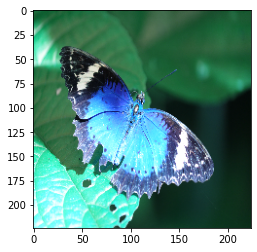

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 1120 trained image filenames belonging 8 class
Found 160 validated image filenames belonging 8 class
Found 320 tested image filenames belonging 8 class


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (11, 11), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
# https://github.com/berilldindar/Pneumonia-Detection-/blob/main/PneumoniaDetection_ALEXNet.ipynb
# https://github.com/Mostafa-Farghly/Covid-19-Detection-With-Deep-Learning

In [ ]:
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
epochs = 10
adam=Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 214, 32)      11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 256)       2

In [ ]:
# https://linuxtut.com/en/4bc6d6174bb3e8461c6d/
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
import torch
import torchvision

# MODEL_DIR = "/content/gdrive/My Drive/AlexNet_Aug/temp"
# 
# if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
#     os.makedirs(MODEL_DIR)
# checkpoint = ModelCheckpoint(filepath = os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),
#                              save_best_only=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# , callbacks=[checkpoint])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
35/35 [==============================] - 278s 8s/step - loss: 1.9897 - accuracy: 0.2125 - val_loss: 1.3491 - val_accuracy: 0.3719
Epoch 2/10
35/35 [==============================] - 275s 8s/step - loss: 1.2062 - accuracy: 0.5143 - val_loss: 0.8002 - val_accuracy: 0.7219
Epoch 3/10
35/35 [==============================] - 283s 8s/step - loss: 0.7526 - accuracy: 0.7295 - val_loss: 0.5178 - val_accuracy: 0.8281
Epoch 4/10
35/35 [==============================] - 284s 8s/step - loss: 0.4757 - accuracy: 0.8321 - val_loss: 0.3442 - val_accuracy: 0.8875
Epoch 5/10
35/35 [==============================] - 278s 8s/step - loss: 0.2471 - accuracy: 0.9241 - val_loss: 0.2409 - val_accuracy: 0.9250
Epoch 6/10
35/35 [==============================] - 283s 8s/step - loss: 0.3093 - accuracy: 0.9062 - val_loss: 0.2600 - val_accuracy: 0.9312
Epoch 7/10
35/35 [==============================] - 278s 8s/step - loss: 0.1052 - accuracy: 0.9679 - val_loss: 0.1461 - val_accuracy: 0.9563
Epoch 8/10
35

In [ ]:
# model_json=model.to_json()
# with open("/content/gdrive/My Drive/AlexNet_Aug/temp/model.json","w") as file:
#     file.write(model_json)
# model.save_weights("/content/gdrive/My Drive/AlexNet_Aug/temp/my_model.h5")
# print("Model berhasil disimpan !! ")

Model berhasil disimpan !! 


In [ ]:
# from tensorflow.keras.models import model_from_json
# json_file = open('/content/gdrive/My Drive/AlexNet_Aug/temp/model.json','r')
# loaded_model_json = json_file.read()
# json_file.close()
# 
# load_model = model_from_json(loaded_model_json)
# load_model.load_weights("/content/gdrive/My Drive/AlexNet_Aug/temp/my_model.h5")
# 
# print("Loadded!")

Loadded!


In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

10/10 [==============================] - 17s 2s/step - loss: 0.1804 - accuracy: 0.9594

Test accuracy: 0.9593750238418579


In [ ]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

35/35 [==============================] - 61s 2s/step - loss: 0.0395 - accuracy: 0.9866

Train accuracy: 0.9866071343421936


In [ ]:
#Graph drawing
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

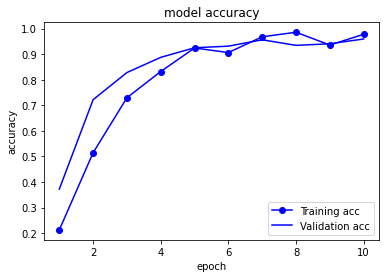

In [ ]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

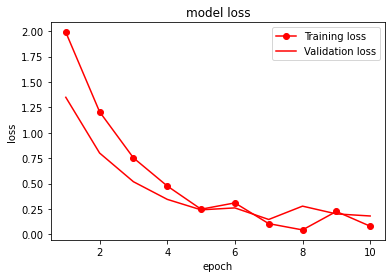

In [ ]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      1.00      1.00        37
         kupu_raja_helena       0.96      1.00      0.98        50
          kupu_hijau_biru       1.00      0.97      0.99        40
           kupu_batik_cap       1.00      0.85      0.92        39
               kupu_jarak       1.00      0.91      0.95        33
          kupu_raja_limau       1.00      0.97      0.99        38
                kupu_jojo       0.87      1.00      0.93        45
        kupu_pantat_merah       0.90      0.95      0.92        38

                 accuracy                           0.96       320
                macro avg       0.97      0.96      0.96       320
             weighted avg       0.96      0.96      0.96       320



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([4, 7, 3, 7, 4, 1, 0, 6, 5, 7, 3, 7, 2, 0, 0, 2, 7, 4, 7, 1, 2, 3,
       6, 6, 4, 4, 1, 3, 3, 2, 2, 5, 1, 6, 6, 0, 4, 6, 6, 1, 6, 1, 5, 5,
       0, 3, 1, 7, 7, 5, 2, 7, 1, 2, 6, 3, 6, 4, 3, 6, 1, 0, 7, 7, 1, 3,
       3, 3, 7, 1, 7, 7, 5, 4, 3, 1, 4, 6, 6, 1, 5, 0, 1, 0, 5, 1, 7, 1,
       6, 7, 2, 4, 4, 2, 5, 1, 7, 0, 5, 7, 6, 3, 6, 0, 7, 1, 7, 7, 6, 2,
       1, 1, 7, 0, 5, 2, 5, 0, 1, 0, 4, 3, 3, 1, 1, 7, 6, 4, 4, 1, 3, 4,
       1, 1, 6, 5, 1, 7, 1, 0, 0, 7, 6, 0, 2, 1, 7, 4, 5, 3, 6, 5, 4, 1,
       0, 3, 3, 2, 2, 1, 2, 2, 5, 0, 2, 2, 2, 6, 7, 0, 1, 7, 5, 1, 2, 5,
       3, 6, 5, 3, 2, 1, 5, 6, 3, 2, 0, 6, 3, 5, 1, 6, 5, 4, 1, 6, 4, 3,
       6, 2, 2, 2, 7, 0, 1, 2, 4, 6, 6, 2, 7, 3, 2, 4, 6, 6, 0, 1, 1, 6,
       1, 6, 5, 7, 2, 6, 4, 5, 1, 7, 7, 5, 2, 0, 4, 6, 1, 4, 2, 0, 3, 0,
       6, 0, 6, 1, 6, 1, 2, 6, 3, 0, 5, 3, 7, 3, 0, 6, 1, 0, 0, 0, 4, 1,
       3, 2, 5, 3, 1, 6, 6, 5, 6, 0, 6, 1, 1, 0, 2, 5, 0, 6, 1, 5, 2, 6,
       7, 6, 0, 2, 7, 6, 5, 0, 5, 3, 6, 5, 7, 3, 6,

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.959375


array([[37,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 33,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 30,  0,  0,  3],
       [ 0,  1,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  1,  0,  0,  0,  0,  1, 36]])

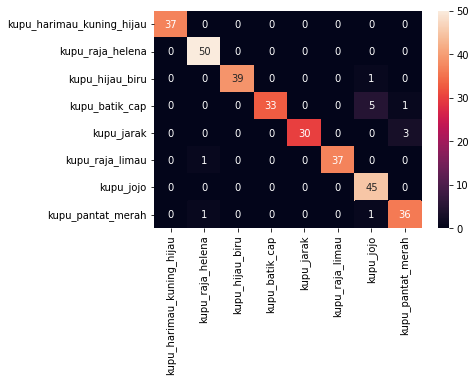

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"], 
           yticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"])